## 0. Import python libraries
<p> Import libraries to use for data analysis </p>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 0.1 Data Exploration
<p> How many rows are common rows? (Want to see what type of merge we will perform. Notice that there are unique order numbers for both csv files (1429 common rows, thus not all of the payouts csv are in the orders csv and vice versa). Thus we want to do an outer merge. </p>

In [2]:
# Load csv to python for cleaning
orders_df = pd.read_csv('/kaggle/input/plantish-interview/faire_orders_unclean.csv')
payouts_df = pd.read_csv('/kaggle/input/plantish-interview/faire_payouts_unclean.csv')

# Find the intersection of 'Order Number' between the two dataframes
common_order_numbers = pd.Series(list(set(orders_df['Order Number']).intersection(set(payouts_df['Order Number']))))

# Count the number of common 'Order Number'
common_order_numbers_count = common_order_numbers.count()

common_order_numbers_count

1429

## 1. Data Cleaning 
<p> I was given two datasets, my first step is to clean them! Then I want to upload the cleaned files for Power BI dashboarding</p>
<p> I also want to combine address 1 and address 2, just in case there is multiple people from the same building ordering products.</p>
<p> I also put a revenue column which is just the quantity of the items, plus the wholesale price. This should be how much money this product made</p>

In [3]:
# Clean the 'Wholesale Price' column and convert it to a numeric format
orders_df['Wholesale Price'] = orders_df['Wholesale Price'].replace('[\$,]', '', regex=True).astype(float)

# Check for duplicate rows
duplicates = orders_df.duplicated()

# Print the number of duplicate rows
print(f'Number of duplicate rows = {duplicates.sum()}')

# Drop duplicate rows
orders_df = orders_df.drop_duplicates()

# Drop cancelled orders from df
orders_df = orders_df[orders_df['Status'] != 'Cancelled']

# Calculate the revenue for each product
orders_df['Revenue'] = orders_df['Quantity'] * orders_df['Wholesale Price']

# Combine 'Address 1' and 'Address 2'
orders_df['Full Address'] = orders_df['Address 1'] + ', ' + orders_df['Address 2'].fillna('')


# Merge the orders_df and payouts_df DataFrames on the 'Order Number' column, left join to keep all orders
merged_df = pd.merge(orders_df, payouts_df, on='Order Number', how='left')



# Save the merged DataFrame to a new CSV file
merged_df.to_csv('C:\\Users\\john2\\Downloads\\merged_orders_payouts.csv', index=False)

Number of duplicate rows = 8


## 2. Top products 
Here, I want to find what our top 10 products are, by total revenue. So to me, the total revenue is just the sum of every revenue generated by the products. I grouped each product then added how much revenue the products made.
I then plotted a bar graph of the top 10 highest revenued items!

In [4]:
# Now we can determine the top-selling products in terms of revenue
top_selling_products = orders_df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False)

print(top_selling_products.head(10))  # Display the top 10 products by revenue

Product Name
Dual-layer Bamboo Soap Dish              13806.02
Solid Dish Soap Bar (8oz)                12089.07
Wooden Essential Oil Diffuser for Car     8595.82
Sisal Dish Brush                          8366.67
Sisal & Palm Pot Scrubber                 8225.78
Reusable Cotton Buds                      7133.33
Eco Sponge                                6647.65
Dry Body Brush (medium-firm)              6558.15
[BUY BULK] Sisal & Palm Pot Scrubber      6074.76
Self-drying Soap Dish                     5810.18
Name: Revenue, dtype: float64


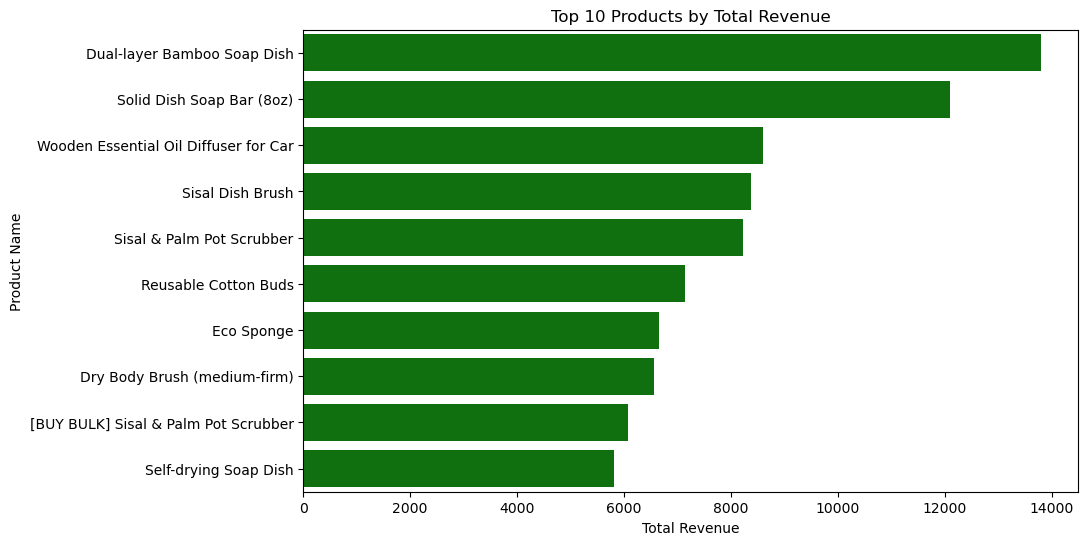

In [5]:
# Adjust previous calculations to get total revenue per product, regardless of the retailer
total_revenue_per_product = orders_df.groupby('Product Name')['Revenue'].sum().reset_index()

# Sort the products by total revenue and get the top 10
top_10_products_total_revenue = total_revenue_per_product.sort_values('Revenue', ascending=False).head(10)

# Create the seaborn barplot for total revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_products_total_revenue, x='Revenue', y='Product Name', color='g')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Total Revenue')
plt.show()

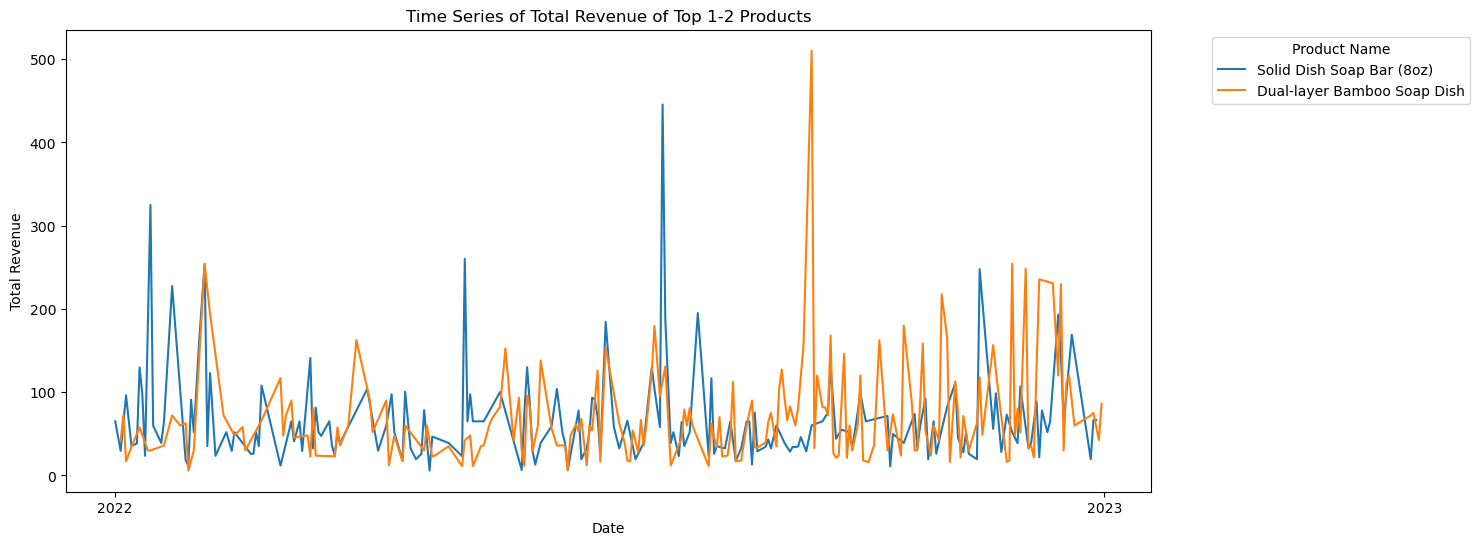

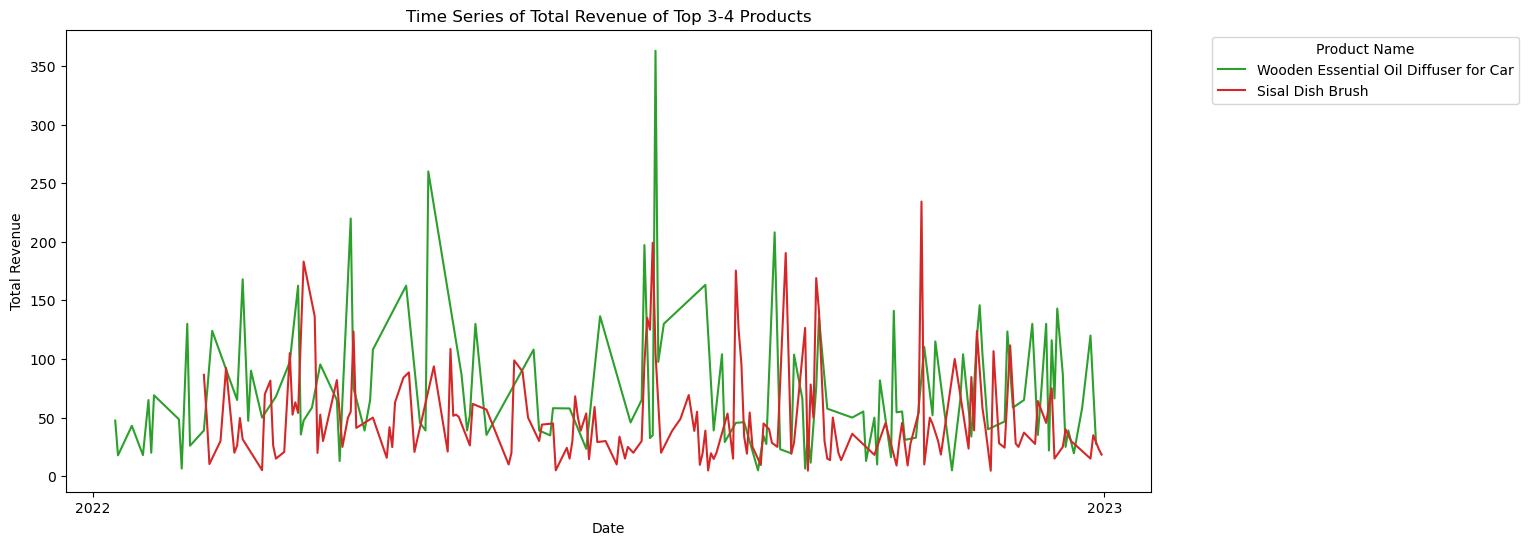

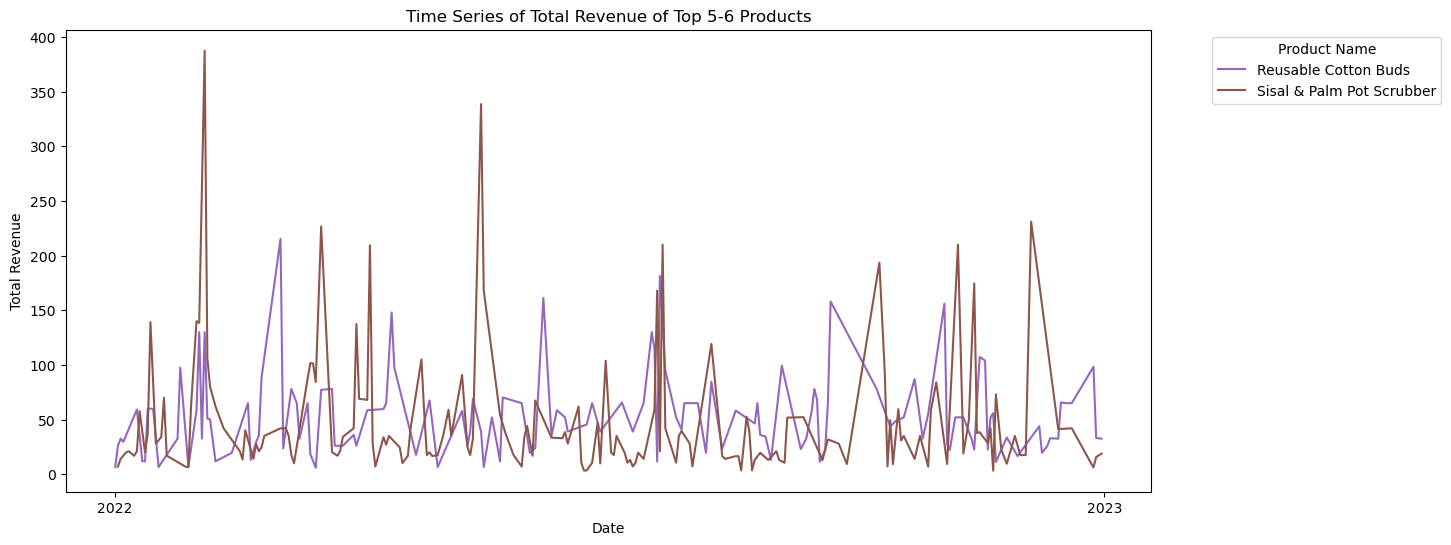

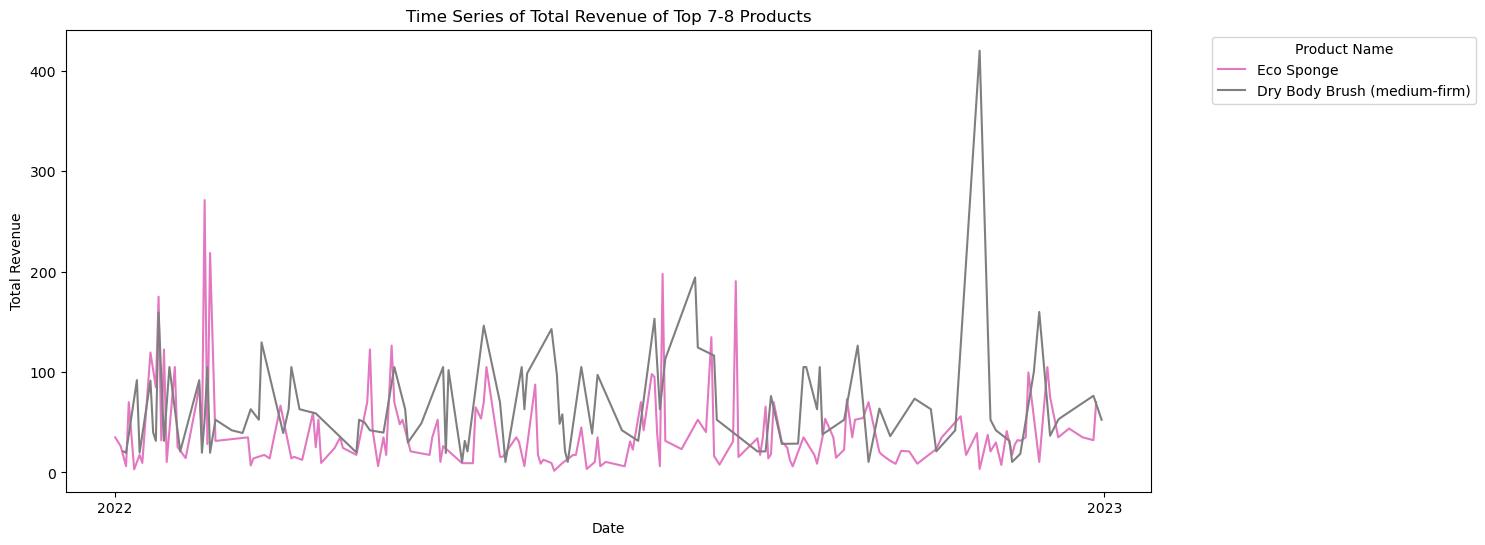

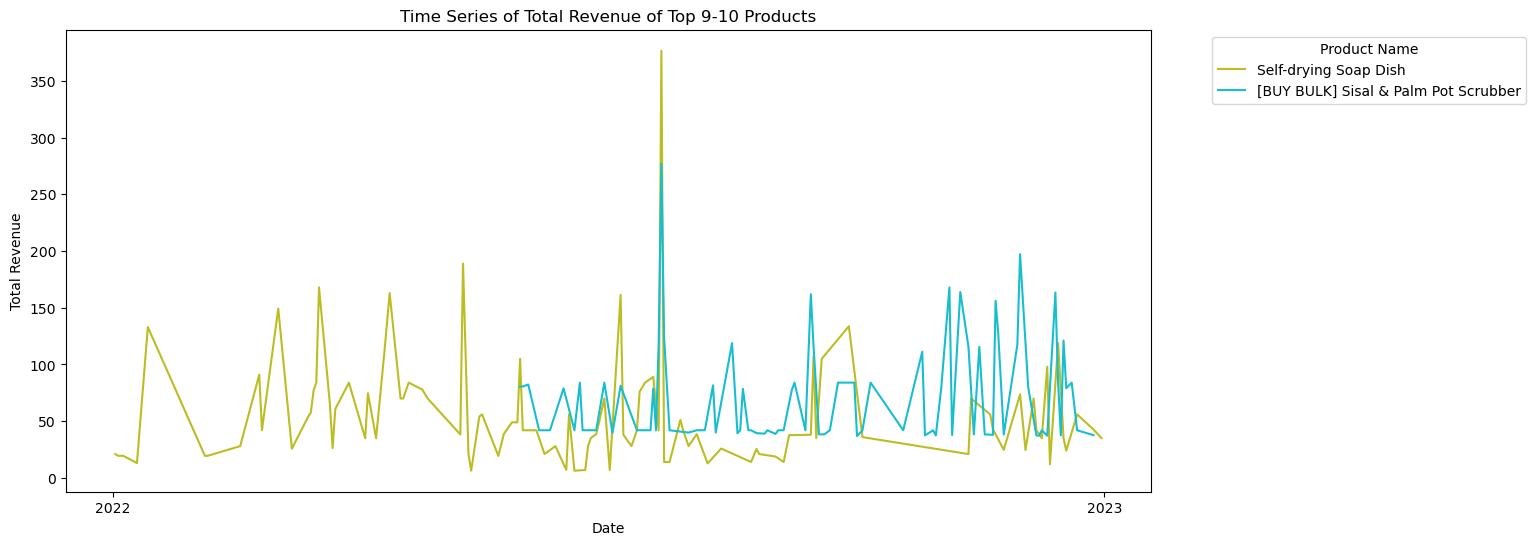

In [6]:
import matplotlib.dates as mdates

# Convert 'Order Date' to datetime format
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

# Calculate total revenue per product
total_revenue_per_product = orders_df.groupby('Product Name')['Revenue'].sum().reset_index()

# Calculate total revenue per product and date
total_revenue_per_product_date = orders_df.groupby(['Order Date', 'Product Name'])['Revenue'].sum().reset_index()

# Separate the top 10 products into five groups
top_1_2_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[0:2]['Product Name'].values
top_3_4_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[2:4]['Product Name'].values
top_5_6_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[4:6]['Product Name'].values
top_7_8_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[6:8]['Product Name'].values
top_9_10_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[8:10]['Product Name'].values

# Filter the time series data for each group of products
top_1_2_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_1_2_products)]
top_3_4_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_3_4_products)]
top_5_6_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_5_6_products)]
top_7_8_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_7_8_products)]
top_9_10_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_9_10_products)]

# Create a list of tuples for the time series data and titles of each group of products
product_time_series_data = [(top_1_2_products_time_series, 'Top 1-2 Products'),
                            (top_3_4_products_time_series, 'Top 3-4 Products'),
                            (top_5_6_products_time_series, 'Top 5-6 Products'),
                            (top_7_8_products_time_series, 'Top 7-8 Products'),
                            (top_9_10_products_time_series, 'Top 9-10 Products')]

color_palettes = [["#1f77b4", "#ff7f0e"],
                  ["#2ca02c", "#d62728"],
                  ["#9467bd", "#8c564b"],
                  ["#e377c2", "#7f7f7f"],
                  ["#bcbd22", "#17becf"]]


# Create line plots for time series analysis of total revenue of each group of products
for (data, title), colors in zip(product_time_series_data, color_palettes):
    fig, ax = plt.subplots(figsize=(14, 6))

    # Plot the data
    sns.lineplot(data=data, x='Order Date', y='Revenue', hue='Product Name', palette=colors, ax=ax)

    # Set the title and labels
    ax.set_title(f'Time Series of Total Revenue of {title}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Revenue')

    # Define the date format
    date_form = mdates.DateFormatter("%Y")
    ax.xaxis.set_major_formatter(date_form)

    # Ensure a major tick for each year using (interval=1)
    ax.xaxis.set_major_locator(mdates.YearLocator())

    plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()



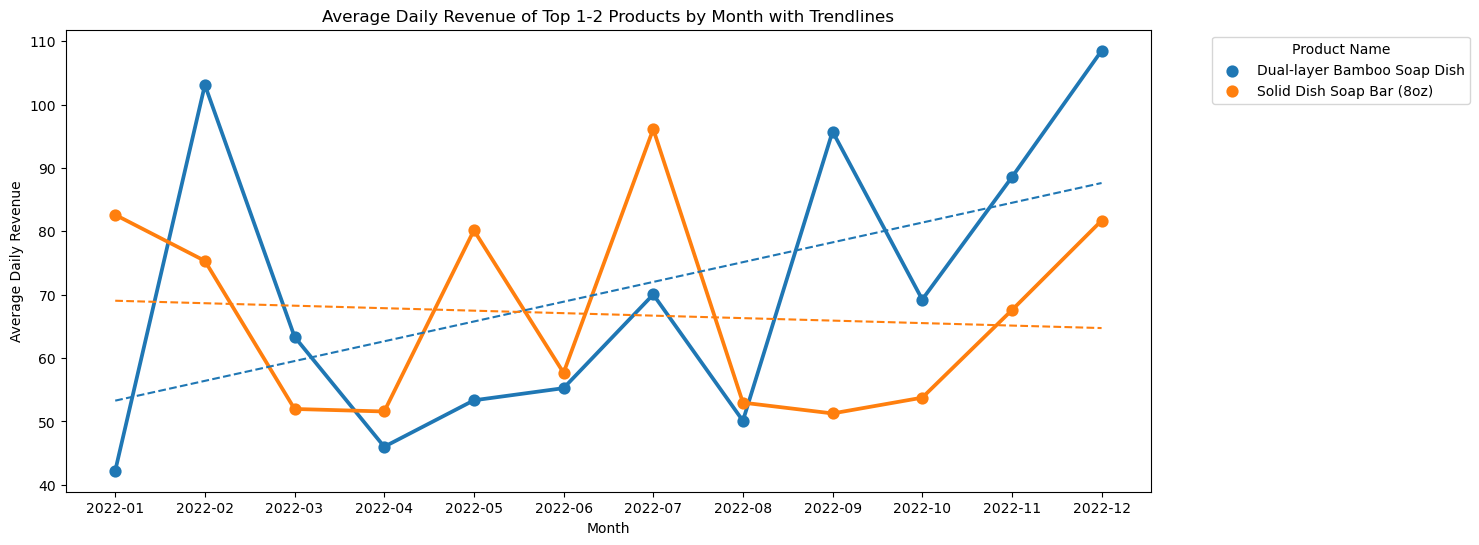

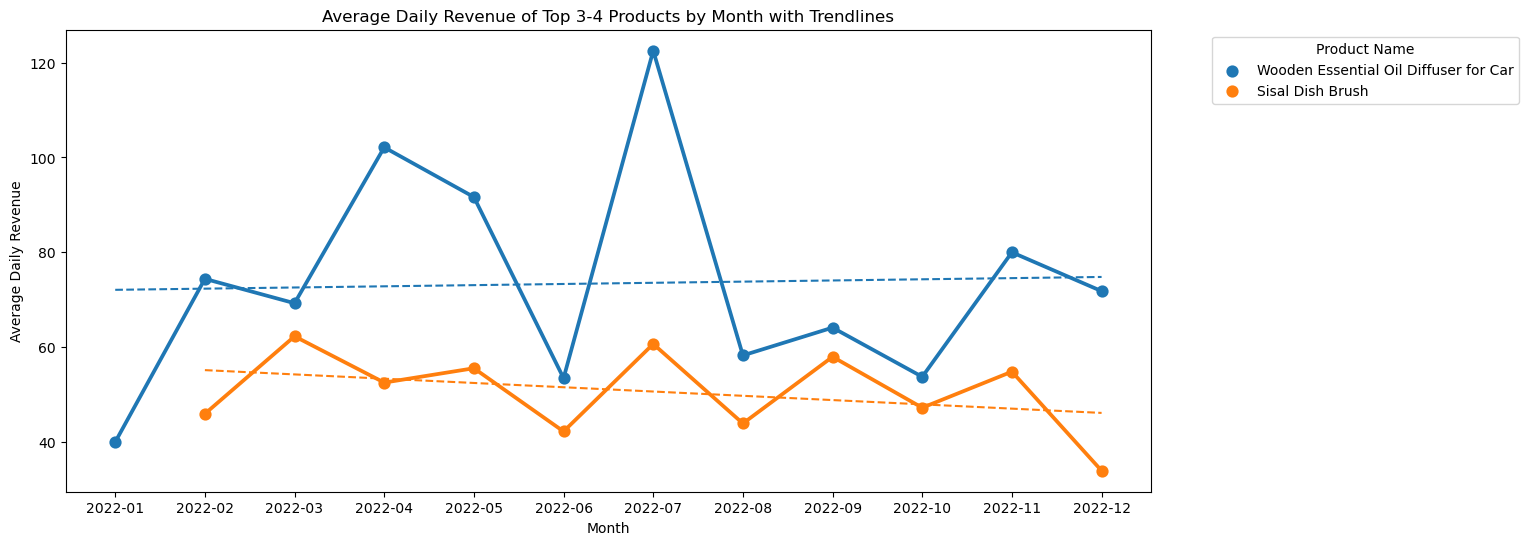

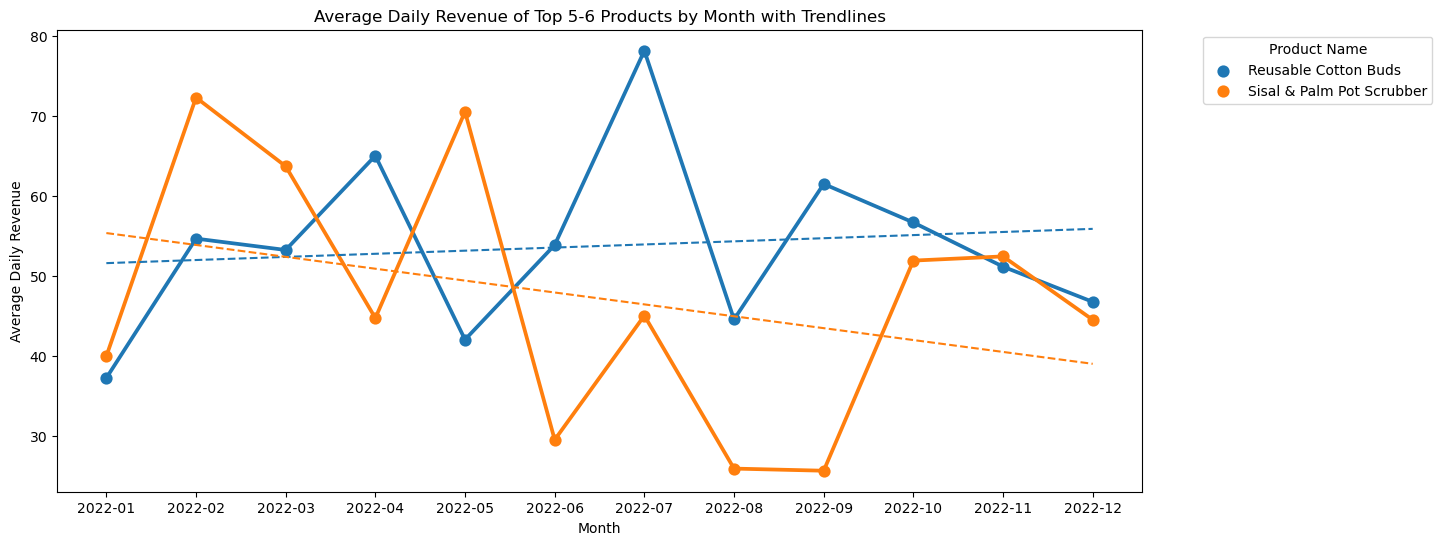

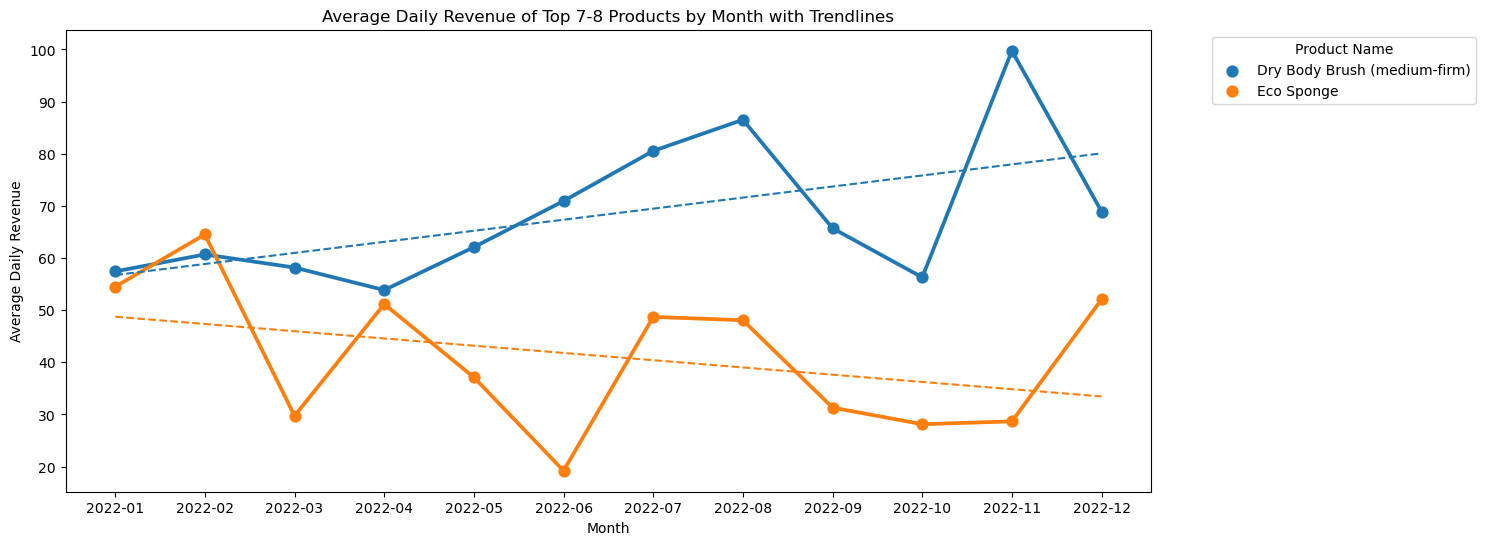

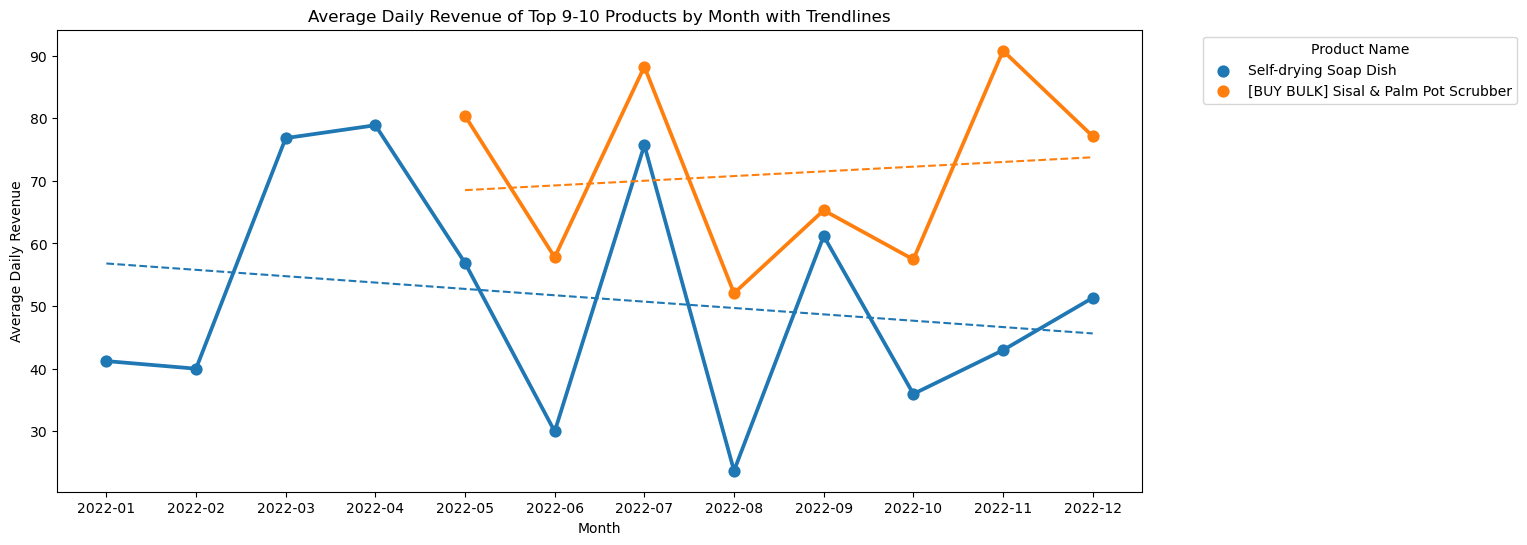

In [7]:
# Convert 'Order Date' to datetime format
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

# Calculate total revenue per product
total_revenue_per_product = orders_df.groupby('Product Name')['Revenue'].sum().reset_index()

# Calculate total revenue per product and date
total_revenue_per_product_date = orders_df.groupby(['Order Date', 'Product Name'])['Revenue'].sum().reset_index()

# Create a column for the year, month, and year-month
total_revenue_per_product_date['Year'] = total_revenue_per_product_date['Order Date'].dt.year
total_revenue_per_product_date['Month'] = total_revenue_per_product_date['Order Date'].dt.month
total_revenue_per_product_date['YearMonth'] = total_revenue_per_product_date['Order Date'].dt.to_period('M')

# Separate the top 10 products into five groups
top_1_2_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[0:2]['Product Name'].values
top_3_4_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[2:4]['Product Name'].values
top_5_6_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[4:6]['Product Name'].values
top_7_8_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[6:8]['Product Name'].values
top_9_10_products = total_revenue_per_product.sort_values('Revenue', ascending=False).iloc[8:10]['Product Name'].values

# Filter the time series data for each group of products
top_1_2_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_1_2_products)]
top_3_4_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_3_4_products)]
top_5_6_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_5_6_products)]
top_7_8_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_7_8_products)]
top_9_10_products_time_series = total_revenue_per_product_date[total_revenue_per_product_date['Product Name'].isin(top_9_10_products)]

# Create a list of tuples for the time series data and titles of each group of products
product_time_series_data = [(top_1_2_products_time_series, 'Top 1-2 Products'),
                            (top_3_4_products_time_series, 'Top 3-4 Products'),
                            (top_5_6_products_time_series, 'Top 5-6 Products'),
                            (top_7_8_products_time_series, 'Top 7-8 Products'),
                            (top_9_10_products_time_series, 'Top 9-10 Products')]

# Create point plots with trendlines for average daily revenue of each group of products
product_average_revenue_data = []

for (data, title) in product_time_series_data:
    monthly_average = data.groupby(['YearMonth', 'Product Name'])['Revenue'].mean().reset_index()
    product_average_revenue_data.append((monthly_average, title))

for (data, title) in product_average_revenue_data:
    plt.figure(figsize=(14, 6))
    
    # Draw the point plot
    point_plot = sns.pointplot(data=data, x='YearMonth', y='Revenue', hue='Product Name')
    
    # Add a trendline for each product
    for product in data['Product Name'].unique():
        product_data = data[data['Product Name'] == product]
        z = np.polyfit(range(len(product_data)), product_data['Revenue'], 1)
        p = np.poly1d(z)
        plt.plot(product_data['YearMonth'].astype(str), p(range(len(product_data))), linestyle='--')
    
    plt.title(f'Average Daily Revenue of {title} by Month with Trendlines')
    plt.xlabel('Month')
    plt.ylabel('Average Daily Revenue')
    plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# ## Findings : Top products
# The top 10 products according to our excel file is :
1. Dual-layer Bamboo Soap Dish              
2. Solid Dish Soap Bar (8oz)                
3. Wooden Essential Oil Diffuser for Car     
4. Sisal Dish Brush                          
5. Sisal & Palm Pot Scrubber                 
6. Reusable Cotton Buds                      
7. Eco Sponge                                
8. Dry Body Brush (medium-firm)              
9. [BUY BULK] Sisal & Palm Pot Scrubber      
10. Self-drying Soap Dish

The bad news is that the growth has not been reaching goals of doubling revenue. The good news is that there is still growth, just not at the levels we want! We can see steady growth within the top sellers in our point plot. There are some actions we can take to imrpove this :

## Recommendations to increase sales of top products
1. One way we can increase sales for the top products is to have a **best sellers list** somewhere in the website. 

2. **Increase the amount of sales**, and advertise the sales through cheap means, maybe through tiktok or blogposts. Notice how the most profitable points are definitely the spikes on the graphs. That is probably due to sales, or a popular tiktok video going viral.

2. We can also **give loyal customers incentive for posting a video about our product on tiktok**. Maybe \\$1 per 1000 views, or \\$1 per 10,000 views. This will result in a bigger audience for the product, and thus more sales.

3. Since these products are heavily purchased, it is a good idea to **incentivize reviewing** with pictures. Give points based on how detailed the review is, via a character limit. This will **help with Google SEO** and in turn, increase sales on the product (and others in the website!)



## 3. Average Customer lifetime value


In [8]:
# Calculate total revenue
total_revenue = merged_df['Revenue'].sum()

# Calculate total unique customers using 'Address 1'
total_unique_customers_address = merged_df['Full Address'].nunique()

# Calculate LTV
LTV_address = total_revenue / total_unique_customers_address
LTV_address

316.58447916666665

## Findings : Average customer lifetime value

The average customer lifetime value is **$316.58** *when grouping for each **unique 'Full Address'** value.*

Average customer lifetime value can increase with programs that increase customer loyalty. To do this, there are many examples :

1. **Customer Loyalty program** : Based on points, like Air Miles or bubble tea based system where the 7th drink is free.

2. **Scheduled purchases** : For daily essentials, there can be scheduled purchases, which can be set by the user. Scheduling purchases can be incentivized by giving a percentage off when you schedule your purchasing. Think Amazon. Subscribe & Save feature.

3. **Sales** : There are some customers that only shop during sales, there may be a benefit in having regular sales for christmas, boxing day, back to school days, etc.

4. **Incentivize bulk purchasing** : Maybe give free shipping for orders $100 or more, or have a discount for that. Or, have a plantish card for loyal customers, thus they will see it whenever they open their wallet and be reminded of Plantish.

## 4. How do promos affect sales?
<p>
I have manually entered each promo into an excel file, so I will upload that to python, then I will compare the revenue of periods WITH promos vs the revenue of periods WITHOUT promos. If the revenue is higher with promos
Then promos successfully increase sales.  
</p>

In [9]:
# Upload excel file to python
promo_data = pd.read_excel('/kaggle/input/plantish-promo/promo_excel.xlsx')

# Display the first few rows of the DataFrame
promo_data.head()

,Name,Date Start,Date End,Products Included,Uses,Status
0,5OFFBUYBULKMAR,2023-03-01,2023-04-01,9,18,active
1,8OFFBUYBULKMAR,2023-03-01,2023-04-01,2,4,active
2,5OFFBUYBULK,2023-01-30,2023-02-28,9,16,complete
3,8OFFBUYBULK,2023-01-30,2023-02-28,1,1,compete
4,WINTERMARKET23,2023-01-23,2023-01-26,50,113,complete


In [10]:
# Convert date columns in both dataframes to datetime format for easy comparison
promo_data['Date Start'] = pd.to_datetime(promo_data['Date Start'])
promo_data['Date End'] = pd.to_datetime(promo_data['Date End'])
merged_df['Order Date_x'] = pd.to_datetime(merged_df['Order Date_x'])

# Initialize a new column with all False (indicating no promotion initially)
merged_df['During Promo'] = False

# Loop over each promotion
for idx, promo in promo_data.iterrows():
    # Update the 'During Promo' column to True for sales that occurred during the current promotion
    merged_df.loc[(merged_df['Order Date_x'] >= promo['Date Start']) & (merged_df['Order Date_x'] <= promo['Date End']), 'During Promo'] = True

# Check the new column
merged_df.head()

,Order Date_x,Order Number,Retailer Name_x,Address 1,Address 2,City,State,Zip Code,Country,Product Name,...,Damaged Or Missing,Promotions,Commission (%),Commission,Placement Fee,Taxes,Shipping Costs,ACH Next Day Fee (%),ACH Next Day Fee,During Promo
0,2022-12-28,ZXWSPMJ7SW,Green Tenderfoot,574 Smithfield Avenue,NaN,Pawtucket,RI,02860,United States,Soap Bag,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,2022-12-31,M3XXF4FYV4,Colorado Real Soap Co.,318 Elk Ave (box 2473),Unit 24,Crested Butte,CO,81224,United States,Konjac Facial Sponge - Charcoal,...,0.0,0.0,15.0,15.60,0.0,0.00,24.08,0.0,0.0,True
2,2022-12-31,M3XXF4FYV4,Colorado Real Soap Co.,318 Elk Ave (box 2473),Unit 24,Crested Butte,CO,81224,United States,Dual-layer Bamboo Soap Dish,...,0.0,0.0,15.0,15.60,0.0,0.00,24.08,0.0,0.0,True
3,2022-12-31,M3XXF4FYV4,Colorado Real Soap Co.,318 Elk Ave (box 2473),Unit 24,Crested Butte,CO,81224,United States,Foxes - Swedish Sponge Cloth,...,0.0,0.0,15.0,15.60,0.0,0.00,24.08,0.0,0.0,True
4,2022-12-31,3JCZTFKH3B,Small Town Collective,719 Main Street,PO BOX 163,Pincher Creek,AB,T0K 1W0,Canada,Sisal Dish Brush,...,0.0,0.0,25.0,71.72,0.0,14.34,37.23,0.0,0.0,True


In [11]:
# Group the sales data by whether a sale occurred during a promotion
grouped_data = merged_df.groupby('During Promo')

# Calculate key metrics for each group
total_sales_volume = grouped_data.size()
total_revenue = grouped_data['Commission'].sum()
average_revenue_per_sale = grouped_data['Commission'].mean()

# Create a DataFrame to hold the results
results = pd.DataFrame({
    'Total Sales Volume': total_sales_volume,
    'Total Revenue': total_revenue,
    'Average Revenue per Sale': average_revenue_per_sale
})

# Display the results
print(results)

print('We can see that there is an increase of ' + str(round(100 * 240008.36/110385.67)) + '% higher revenue when there is a promo compared to no promo')

              Total Sales Volume  Total Revenue  Average Revenue per Sale
During Promo                                                             
False                       3223      110385.67                 35.619771
True                        6208      240008.36                 40.473585
We can see that there is an increase of 217% higher revenue when there is a promo compared to no promo


In [12]:
# Get the earliest and latest dates in the sales data
earliest_date = merged_df['Order Date_x'].min()
latest_date = merged_df['Order Date_x'].max()

# Calculate the total number of days in this range
total_days = (latest_date - earliest_date).days + 1  # "+1" to include both the start and end dates

# Create a DataFrame to hold all dates in this range
all_dates = pd.DataFrame(index=pd.date_range(start=earliest_date, end=latest_date))

# Initialize a new column to indicate whether each date is a promo date
all_dates['Is Promo'] = False

# Loop over each promotion
for idx, promo in promo_data.iterrows():
    # Update the 'Is Promo' column for dates that fall within the current promotion
    all_dates.loc[(all_dates.index >= promo['Date Start']) & (all_dates.index <= promo['Date End']), 'Is Promo'] = True

# Calculate the number of promo and non-promo days
promo_days = all_dates['Is Promo'].sum()
non_promo_days = total_days - promo_days

# Display the results
print('There were ' + str(promo_days) + ' days with promotions available to be used and ' + str(non_promo_days) + ' days with no promotion available. This results in ' + str(round(100 - 100 * (163/202))) + ' percent more days with promo than without.')


There were 202 days with promotions available to be used and 163 days with no promotion available. This results in 19 percent more days with promo than without.


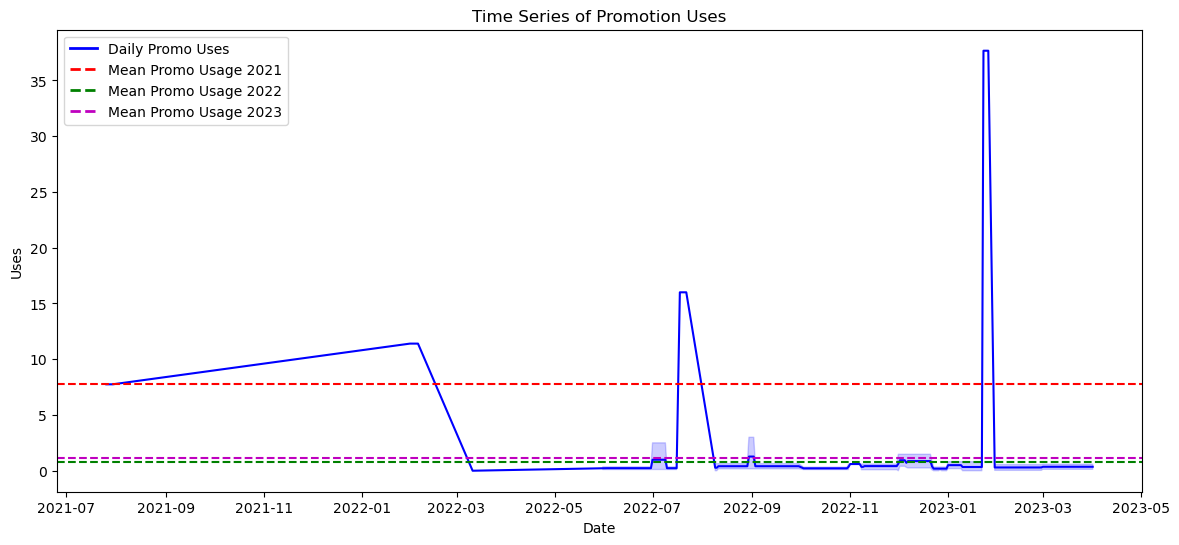

In [13]:
# Initialize an empty DataFrame to hold all promo dates and their daily usage
all_promo_dates = pd.DataFrame(columns=['Date', 'Daily Promo Uses'])

# Initialize an empty list to hold all promo_dates dataframes
all_promo_dates_list = []

# Loop over each promotion
for idx, promo in promo_data.iterrows():
    # Calculate the duration of the promotion
    duration = (promo['Date End'] - promo['Date Start']).days
    # If the start and end dates are the same, set the duration to 1
    if duration == 0:
        duration = 1

    # Create a DataFrame for all dates of the current promotion and their daily usage
    promo_dates = pd.DataFrame(data={
        'Date': pd.date_range(start=promo['Date Start'], end=promo['Date End']),
        'Daily Promo Uses': promo['Uses'] / duration
    })
    # Append the dates of the current promotion to the list
    all_promo_dates_list.append(promo_dates)

# Concatenate all dataframes in the list into the main DataFrame
all_promo_dates = pd.concat(all_promo_dates_list)

# Convert 'Date' to datetime format for plotting
all_promo_dates['Date'] = pd.to_datetime(all_promo_dates['Date'])

# Add a column for the year
all_promo_dates['Year'] = all_promo_dates['Date'].dt.year

# Compute the mean promo usage for each year
mean_promo_usage_by_year = all_promo_dates.groupby('Year')['Daily Promo Uses'].mean()

# Create a time series plot for 'Uses' over time with mean promo usage lines
plt.figure(figsize=(14, 6))
sns.lineplot(data=all_promo_dates, x='Date', y='Daily Promo Uses', color='b')

# Create line plots for each year and keep a reference to the lines for the legend
lines = [plt.Line2D([0], [0], color='b', linewidth=2)]  # Line for 'Daily Promo Uses'
year_colors = {2021: 'r', 2022: 'g', 2023: 'm'}  # Colors for each year
for year in mean_promo_usage_by_year.index:
    plt.axhline(y=mean_promo_usage_by_year[year], color=year_colors[year], linestyle='--')
    lines.append(plt.Line2D([0], [0], color=year_colors[year], linewidth=2, linestyle='--'))  # Line for each year

plt.xlabel('Date')
plt.ylabel('Uses')
plt.title('Time Series of Promotion Uses')

# Create a custom legend
labels = ['Daily Promo Uses'] + [f'Mean Promo Usage {year}' for year in mean_promo_usage_by_year.index]
plt.legend(lines, labels)

plt.show()



## Findings : How do promos affect sales?

We can see that there was **217% more revenue generated when there are promo days**. I wondered if the reason for this was because there were more promo days in total, so used Python to check how many days had promo and how many days did not have promo. There were indeed m**ore days that had promo but it was only 19% more days**, thus **the 217% increase in promo is mostly due to the promos themselves** and not the fact that there were more promo days than not.

This increase, however can also be attributed to the fact that the company has had promos more recently than before, and thus they had a bigger customer base than when they did not hold any promos. 

Also, people typically spend more during holidays and that is usually when promos are held. It is still a good idea to hold promos during the holidays as it gives incentive for users to buy our products instead of products from somewhere else that is also holding promotions.

We can see that **promo usage spikes during certain times**, probably a great promo or a successful marketing venture (I can see that the **wintermarket** promos were successful). 

What I see that is missing is there are **less promos than ideal being used during black friday, or christmas times, as it seems promo usage is just about average during those days**. I feel like this is a huge miss in opportunity, because this is when a vast amount of people spend a lot of their hard earned money!

We can see that promo usage was actually more prevalent in 2021, but dropped in 2022. It is hard to conclude how much promo usage happened in 2023, as the year is not finished but so far it is a little bit more than in 2022.

In [14]:
# Reupload CSV file to include promo data
# Save the merged DataFrame to a new CSV file
merged_df.to_csv('C:\\Users\\john2\\Downloads\\merged_orders_payouts2.csv', index=False)

## 5. What is the average total order value?
I noticed that repeated order numbers are shown, and with that they also repeat the total order value. This is not ideal, as it'll skew the total order value if I had not noticed this.
What I did to circumvent this issue is to only add order total per unique order number. Then, I found the average.

In [15]:
# Get the unique order values by dropping duplicates based on 'Order Number'
unique_order_values = merged_df.drop_duplicates('Order Number')['Order Total']

# Calculate the average order value
average_order_value_unique = unique_order_values.mean()

# Display the result
print('The average order value is $' + str(round((average_order_value_unique),2)))

The average order value is $162.7


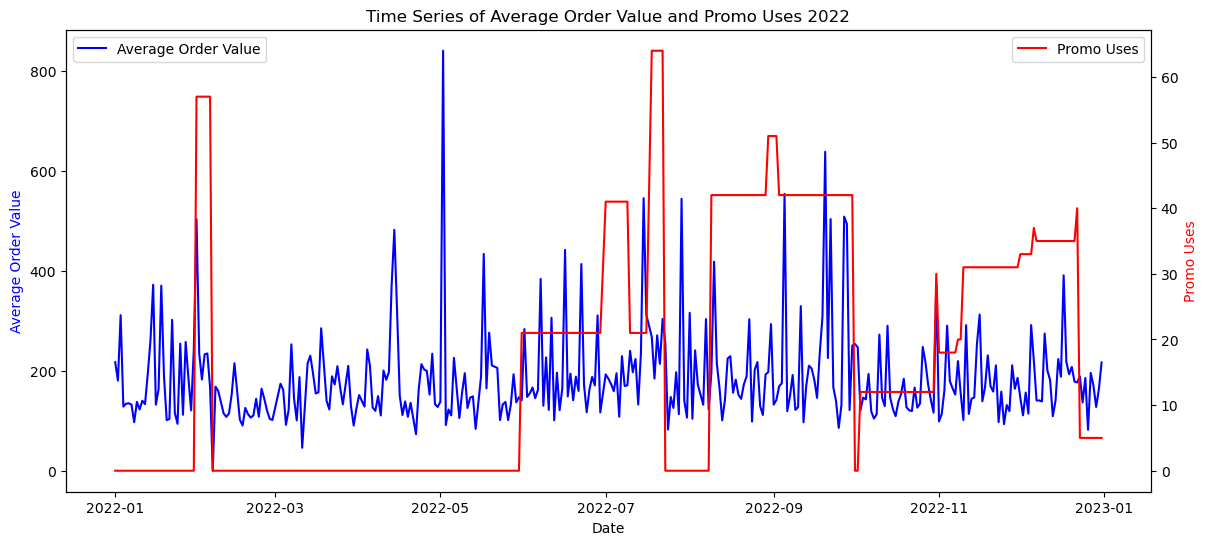

In [16]:
# Calculate average order value by day
average_order_value_by_day = merged_df.groupby('Order Date_x')['Order Total'].mean().reset_index()

# Create a DataFrame to hold all dates in the range of the promo data
all_dates = pd.DataFrame(index=pd.date_range(start=promo_data['Date Start'].min(), end=promo_data['Date End'].max()))

# Initialize a new column to hold the daily promo uses
all_dates['Daily Promo Uses'] = 0

# Loop over each promotion
for idx, promo in promo_data.iterrows():
    # Update the 'Daily Promo Uses' column for dates that fall within the current promotion
    all_dates.loc[(all_dates.index >= promo['Date Start']) & (all_dates.index <= promo['Date End']), 'Daily Promo Uses'] += promo['Uses']

# Reset the index to create a new column for the date
all_dates.reset_index(inplace=True)
all_dates.rename(columns={'index': 'Date'}, inplace=True)

# Merge all_dates with average_order_value_by_day on date
merged_data = pd.merge(average_order_value_by_day, all_dates, how='left', 
                        left_on='Order Date_x', right_on='Date').fillna(0)

# Create a twin Axes sharing the x-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Create the lineplot for daily average order value on the first Axes
sns.lineplot(data=merged_data, x='Date', y='Order Total', color='b', ax=ax1, label='Average Order Value')

# Create a new Axes instance with a shared x-axis
ax2 = ax1.twinx()

# Create the lineplot for daily promo uses on the second Axes
sns.lineplot(data=merged_data, x='Date', y='Daily Promo Uses', color='r', ax=ax2, label='Promo Uses')

# Set labels
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Order Value', color='b')
ax2.set_ylabel('Promo Uses', color='r')
plt.title('Time Series of Average Order Value and Promo Uses 2022')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

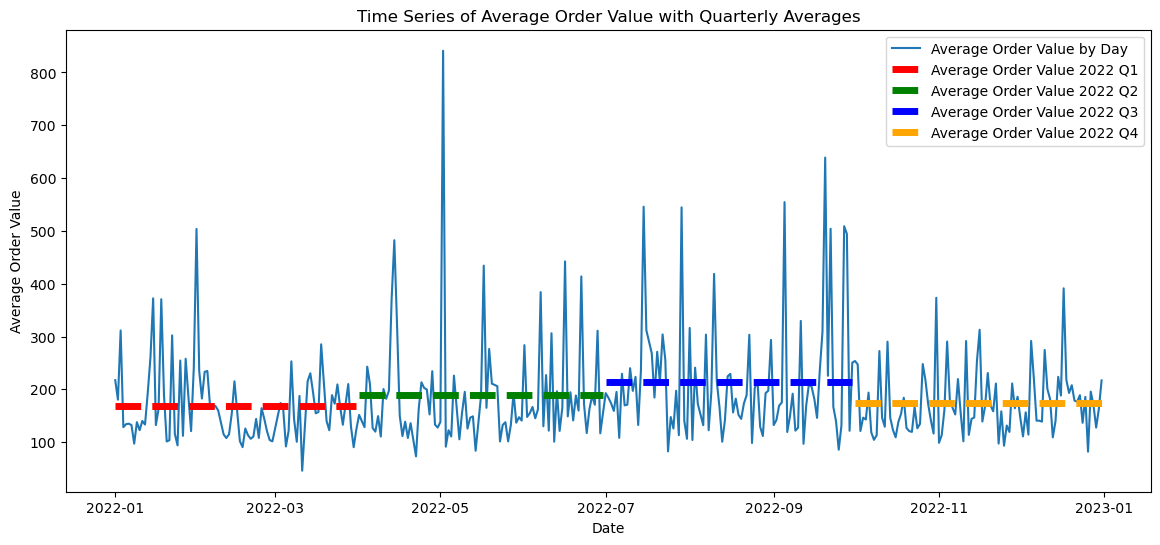

In [17]:
# Convert 'Order Date_x' to datetime format
merged_df['Order Date_x'] = pd.to_datetime(merged_df['Order Date_x'])

# Calculate average order value by day
average_order_value_by_day = merged_df.groupby('Order Date_x')['Order Total'].mean().reset_index()

# Create a column for the year
average_order_value_by_day['Year'] = average_order_value_by_day['Order Date_x'].dt.year

# Create a column for the quarter
average_order_value_by_day['Quarter'] = average_order_value_by_day['Order Date_x'].dt.quarter

# Filter average_order_value_by_day for each quarter of 2022
order_value_Q1 = average_order_value_by_day[(average_order_value_by_day['Year'] == 2022) & (average_order_value_by_day['Quarter'] == 1)]
order_value_Q2 = average_order_value_by_day[(average_order_value_by_day['Year'] == 2022) & (average_order_value_by_day['Quarter'] == 2)]
order_value_Q3 = average_order_value_by_day[(average_order_value_by_day['Year'] == 2022) & (average_order_value_by_day['Quarter'] == 3)]
order_value_Q4 = average_order_value_by_day[(average_order_value_by_day['Year'] == 2022) & (average_order_value_by_day['Quarter'] == 4)]

# Calculate the average order value for each quarter
average_order_value_Q1 = order_value_Q1['Order Total'].mean()
average_order_value_Q2 = order_value_Q2['Order Total'].mean()
average_order_value_Q3 = order_value_Q3['Order Total'].mean()
average_order_value_Q4 = order_value_Q4['Order Total'].mean()

# Calculate the start and end dates for each quarter
start_date_Q1 = pd.Timestamp(year=2022, month=1, day=1)
end_date_Q1 = pd.Timestamp(year=2022, month=3, day=31)

start_date_Q2 = pd.Timestamp(year=2022, month=4, day=1)
end_date_Q2 = pd.Timestamp(year=2022, month=6, day=30)

start_date_Q3 = pd.Timestamp(year=2022, month=7, day=1)
end_date_Q3 = pd.Timestamp(year=2022, month=9, day=30)

start_date_Q4 = pd.Timestamp(year=2022, month=10, day=1)
end_date_Q4 = pd.Timestamp(year=2022, month=12, day=31)

# Create time series plot for average total order value by day
plt.figure(figsize=(14, 6))

# Time series plot
sns.lineplot(data=average_order_value_by_day, x='Order Date_x', y='Order Total', label='Average Order Value by Day')

# Add horizontal lines to represent the average order value for each quarter
plt.hlines(y=average_order_value_Q1, xmin=start_date_Q1, xmax=end_date_Q1, color='r', linestyle='--', linewidth=5, label='Average Order Value 2022 Q1')
plt.hlines(y=average_order_value_Q2, xmin=start_date_Q2, xmax=end_date_Q2, color='g', linestyle='--', linewidth=5, label='Average Order Value 2022 Q2')
plt.hlines(y=average_order_value_Q3, xmin=start_date_Q3, xmax=end_date_Q3, color='b', linestyle='--', linewidth=5, label='Average Order Value 2022 Q3')
plt.hlines(y=average_order_value_Q4, xmin=start_date_Q4, xmax=end_date_Q4, color='orange', linestyle='--', linewidth=5, label='Average Order Value 2022 Q4')

plt.xlabel('Date')
plt.ylabel('Average Order Value')
plt.title('Time Series of Average Order Value with Quarterly Averages')
plt.legend()
plt.show()

## Findings : What is the average total order value? How do we increase this?
### The average total order value is $162.7 USD

To increase he average order value, there are multiple suggestions :
1. We can add **incentives to increase order value -- like a free shipping** deal for orders over \\$100 or give a free item after surpassing \\$200

2. We can have **combo deals / packs that work with each other**. This could add an item that customers otherwise would  not have purchased.

3. **More frequent promotions and sales** -- Sales can lead to customers buying more products and bulk buying due to lower cost. We can see that promotions used in Q4 is not as high as it should be, as this is when people are most willing to part with their money (Christmas, Hanukkah, new years, etc).

4. **Focus on Q4 sales **, like bulk buying as this is when people spend their money. It seems that Q4 has low average order value because people are buying a gift for their friend, so maybe we can incentivize a larger order as people usually spend their money in Q4.

## 6. Wholesale customers pay for shipping. What are the most common shipping locations and how does that affect our shipping costs?


In [18]:
# Drop duplicate order numbers to consider each order only once
unique_orders = merged_df.drop_duplicates('Order Number')

# Calculate the most common shipping locations
most_common_shipping_locations = merged_df['Full Address'].value_counts().head(10)

# Calculate the most common shipping locations for unique orders
most_common_shipping_locations_unique_orders = unique_orders['Full Address'].value_counts().head(10)

# Display the most common shipping locations for unique orders
print(most_common_shipping_locations_unique_orders)

40 Strachan Court Southeast, 2A             13
421 Dominion Street,                        12
149 Main Street North,                      11
655 East 15th Avenue,                       10
92 S Moger Ave, Attn: Michael Mast          10
2113 West Anderson Lane, Suite B            10
193 Bellevue Avenue, DRY GOODS REFILLERY    10
2000 North Rock Road, Suite 122             10
4723 50th Ave, Box 1626                      9
138 Ashburton Rd,                            9
Name: Full Address, dtype: int64


In [19]:
# Calculate the average shipping cost for the most common shipping locations
average_shipping_costs_per_location = unique_orders.groupby('Full Address')['Shipping Costs'].mean().loc[most_common_shipping_locations_unique_orders.index]

# Display the results
average_shipping_costs_per_location

40 Strachan Court Southeast, 2A             23.210769
421 Dominion Street,                        15.625000
149 Main Street North,                      29.747778
655 East 15th Avenue,                       15.355556
92 S Moger Ave, Attn: Michael Mast          42.104000
2113 West Anderson Lane, Suite B            15.319000
193 Bellevue Avenue, DRY GOODS REFILLERY    22.164000
2000 North Rock Road, Suite 122             26.560000
4723 50th Ave, Box 1626                     18.258750
138 Ashburton Rd,                           24.768000
Name: Shipping Costs, dtype: float64

In [20]:
# Calculate the average shipping cost
average_shipping_cost = unique_orders['Shipping Costs'].mean()
rounded_average_shipping_cost = round(average_shipping_cost,2)
print('The average shipping cost per order is $' + str(rounded_average_shipping_cost))

The average shipping cost per order is $22.64


## Findings : Wholesale customers pay for shipping. What are the most common shipping locations and how does that affect our shipping costs?
We can see that the top 10 shipping locations are :
1. 40 Strachan Court Southeast
2. 421 Dominion Street            
3. 149 Main Street North
4. 655 East 15th Avenue           
5. 92 S Moger Ave           
6. 2113 West Anderson Lane         
7. 193 Bellevue Avenue                
8. 2000 North Rock Road        
9. 4723 50th Ave          
10. 138 Ashburton Rd                  

The average shipping cost of all orders is \\$22.64, and 5 out of 10 of the top shipping locations have higher shipping costs than the average.
Therefore, shipping costs do not affect the top 10 shipping locations as much.

Although, it could still be better and having warehouses closer to some of the top shipping locations, particularly 92 S Moger Ave, who pays \\$42.1 per shipping order would be benefitial. This is because a farther shipping location would mean a higher shipping cost.

## 7. How can we improve our inventory management to reduce costs and increase efficiency?


In [21]:
# Calculate the total cost of damaged or missing items
total_cost_damaged_missing = merged_df['Damaged Or Missing'].sum()

print('The total cost of all damaged or missing goods is $' + str(total_cost_damaged_missing))

The total cost of all damaged or missing goods is $9448.08


In [22]:
# Extract rows where 'Damaged Or Missing' column has an entry (non-null and > 0)
damaged_missing_df = merged_df[merged_df['Damaged Or Missing'].notna() & (merged_df['Damaged Or Missing'] > 0)]

# Get the min and max 'Order Date_x' for these entries
min_date_damaged_missing = damaged_missing_df['Order Date_x'].min()
max_date_damaged_missing = damaged_missing_df['Order Date_x'].max()

min_date_damaged_missing, max_date_damaged_missing

# Calculate the number of days from the minimum to the maximum order date where 'Damaged Or Missing' has an entry
num_days_damaged_missing = (max_date_damaged_missing - min_date_damaged_missing).days + 1

# Calculate the average cost per day due to damaged or missing items, considering only days with such entries
avg_cost_per_day_damaged_missing = total_cost_damaged_missing / num_days_damaged_missing

print('The range of dates that covered damaged or missing items in our data is ' + str(num_days_damaged_missing) + ' days. Thus the average cost per day for damaged or missing items is $' + str(round(avg_cost_per_day_damaged_missing,2)))


The range of dates that covered damaged or missing items in our data is 316 days. Thus the average cost per day for damaged or missing items is $29.9


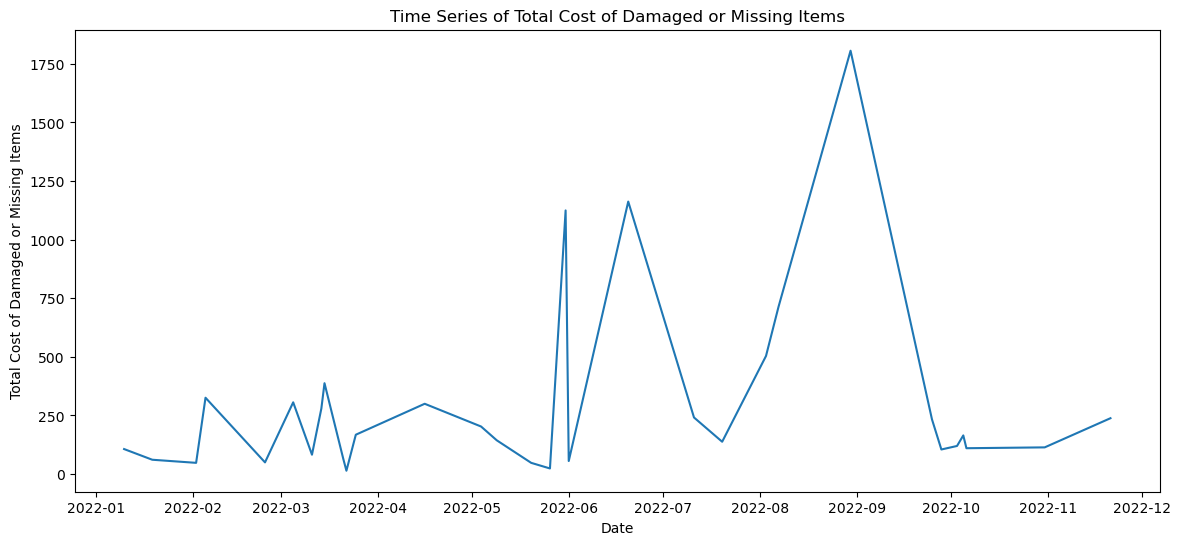

In [23]:
# Group the data by 'Order Date_x' and calculate the total cost of 'Damaged Or Missing' for each date
damaged_missing_time_series = damaged_missing_df.groupby('Order Date_x')['Damaged Or Missing'].sum().reset_index()

# Create a line plot for time series analysis of total cost of damaged or missing items
plt.figure(figsize=(14, 6))
sns.lineplot(data=damaged_missing_time_series, x='Order Date_x', y='Damaged Or Missing')
plt.title('Time Series of Total Cost of Damaged or Missing Items')
plt.xlabel('Date')
plt.ylabel('Total Cost of Damaged or Missing Items')
plt.show()

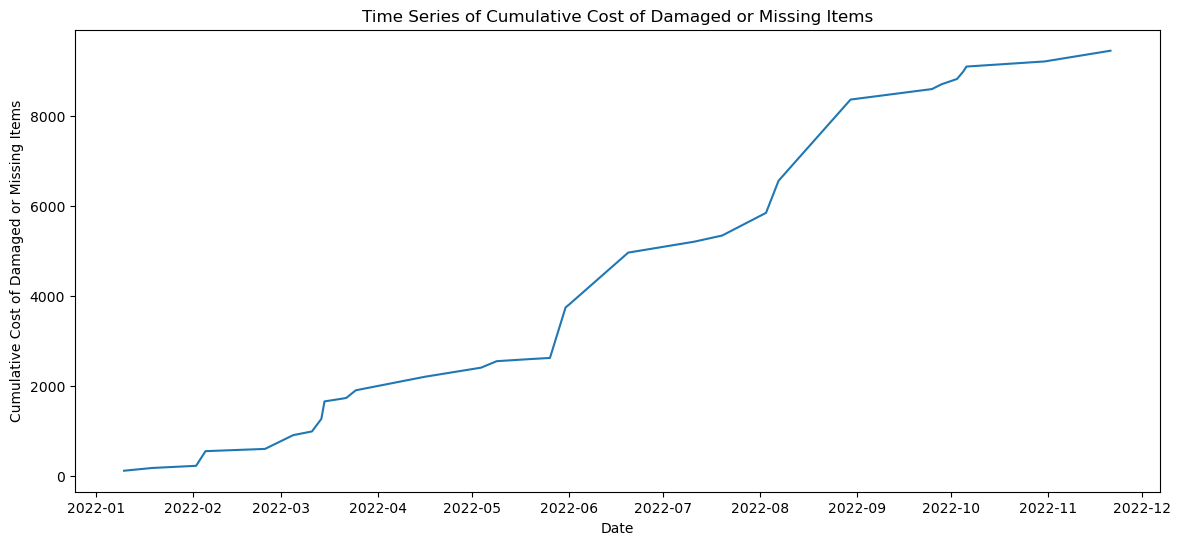

In [24]:
# Calculate the cumulative cost of 'Damaged Or Missing' over time
damaged_missing_time_series['Cumulative Cost'] = damaged_missing_time_series['Damaged Or Missing'].cumsum()

# Create a line plot for time series analysis of cumulative cost of damaged or missing items
plt.figure(figsize=(14, 6))
sns.lineplot(data=damaged_missing_time_series, x='Order Date_x', y='Cumulative Cost')
plt.title('Time Series of Cumulative Cost of Damaged or Missing Items')
plt.xlabel('Date')
plt.ylabel('Cumulative Cost of Damaged or Missing Items')
plt.show()

## Findings : Inventory management
I found that the **on average, the company loses \\$29.9 due to damaged or missing products with a total of \\$9448.08 lost due to missing or damaged items.**

This is assuming that the range of 316 days that damaged was tracked is consistent with the the days where damage was not tracked.

We can see that most of the money lost due to missing or damaged items are caused by huge spikes. This may be because that is when inventory was checked to be missing or it could be due to a large shipping incident that had caused a large amount of inventory to be damaged.

## Suggestions for inventory management
1. More than one warehouse, maybe an east and west warehouse. This is so the shipping distance is less per order. This could decrease shipping cost and also, less travel means less chance of damaged product.
2. Inventory audits : More regular counting of material or sorting / organization could lead to less inventory going missing.
3. Inventory tracking : Use inventory management software to track inventory levels in real-time, which can help prevent shortages and excesses.
4. Many products get damaged during shipping due to inadequate or improper packaging. Investing in better packaging materials and techniques can reduce the damage rate.
5. Use sales data and analytics to forecast future demand for products. This can help you keep the right amount of stock on hand and avoid overstocking or understocking.

## 8. What is the average customer acquisition cost and how can we reduce it to increase profitability?


In [25]:
# Create a column 'New Customer' which is True for the first order of each customer and False for subsequent orders
merged_df_sorted = merged_df.sort_values('Order Date_x')
merged_df_sorted['New Customer'] = ~merged_df_sorted.duplicated('Full Address')

# Calculate the total revenue from new customers
total_revenue_new_customers = merged_df_sorted.loc[merged_df_sorted['New Customer'], 'Order Total'].sum()

# Calculate the total marketing expense
# Using 25% for new customer
total_marketing_expense = total_revenue_new_customers * 0.25

# Calculate the number of new customers
total_new_customers = merged_df_sorted['New Customer'].sum()

# Calculate the CAC
CAC = total_marketing_expense / total_new_customers

print('The Customer Acquisition Cost (CAC) is $' + str(round(CAC, 2)))

The Customer Acquisition Cost (CAC) is $38.67


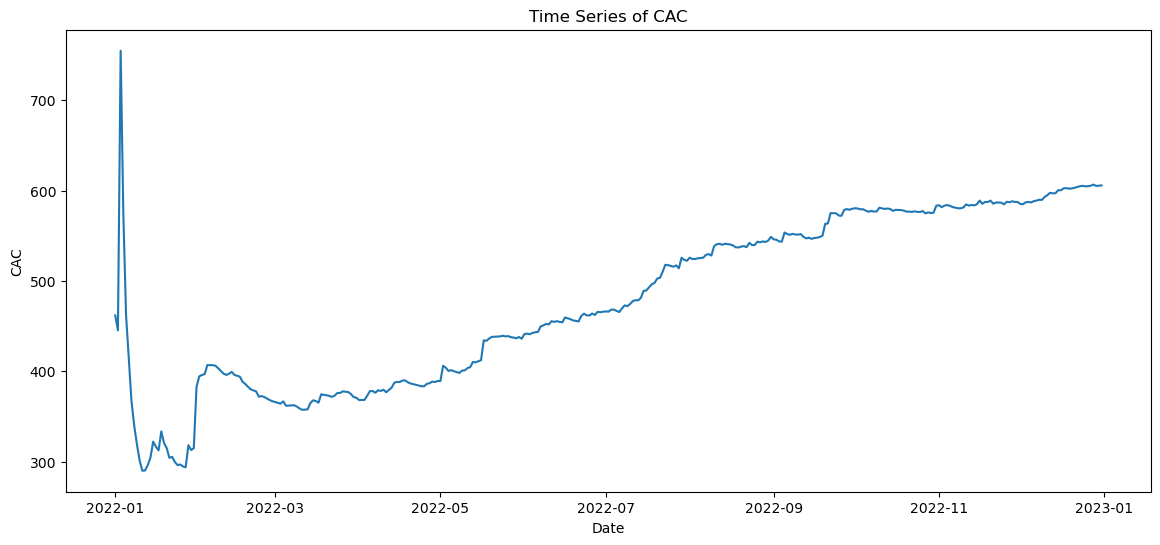

In [26]:
# Create a column 'New Customer Date' which is the date of the first order for each customer and NaN for subsequent orders
merged_df_sorted['New Customer Date'] = merged_df_sorted.loc[merged_df_sorted['New Customer'], 'Order Date_x']

# Group by 'Order Date_x' and sum both the 'New Customer' and 'Order Total' columns
grouped_by_date = merged_df_sorted.groupby('Order Date_x').agg({'New Customer': 'sum', 'Order Total': 'sum'}).reset_index()

# Calculate the cumulative sums of these two new columns over time
grouped_by_date['Cumulative New Customers'] = grouped_by_date['New Customer'].cumsum()
grouped_by_date['Cumulative Revenue New Customers'] = grouped_by_date['Order Total'].cumsum()

# Create a column 'Cumulative CAC' by dividing the cumulative marketing expense by the cumulative number of new customers
grouped_by_date['Cumulative CAC'] = (grouped_by_date['Cumulative Revenue New Customers'] * 0.25) / grouped_by_date['Cumulative New Customers']

# Create a lineplot of CAC over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=grouped_by_date, x='Order Date_x', y='Cumulative CAC')
plt.title('Time Series of CAC')
plt.xlabel('Date')
plt.ylabel('CAC')
plt.show()

## Findings : Customer Aquisitic Cost
I can see that the CAC is steadily increasing. This could be due to the number of customers growing

 ## 9. Extra research : Total Revenue
I personally feel like the metric for growth is total revenue. If total revenue is increasing per day that is a good sign! Let's check if that's the case here : 


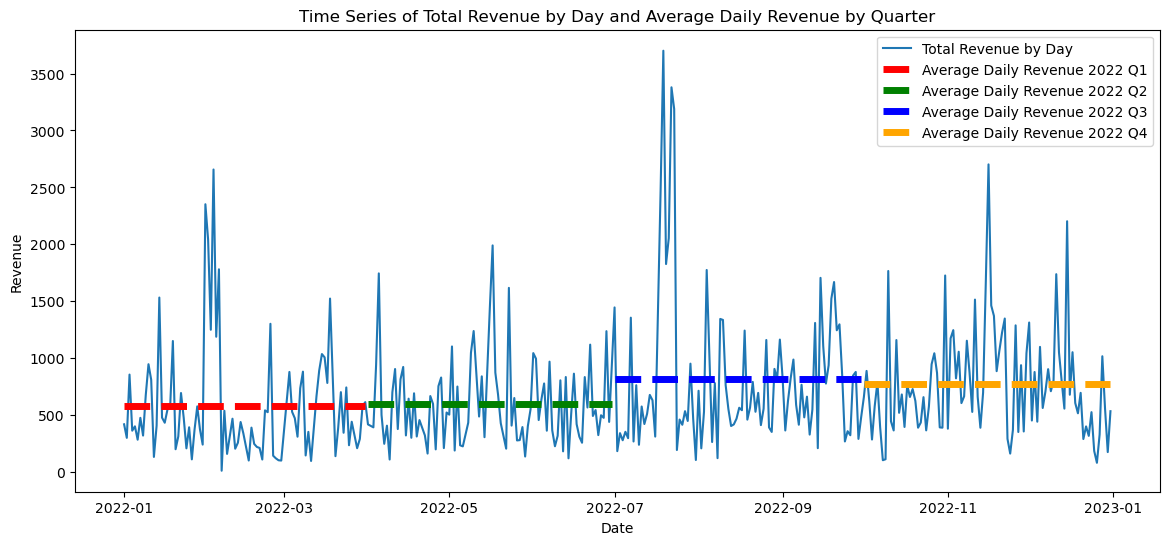

In [27]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Order Date_x' to datetime format
merged_df['Order Date_x'] = pd.to_datetime(merged_df['Order Date_x'])

# Calculate total revenue per day
total_revenue_per_day = merged_df.groupby('Order Date_x')['Revenue'].sum().reset_index()

# Create a column for the year
total_revenue_per_day['Year'] = total_revenue_per_day['Order Date_x'].dt.year

# Create a column for the month
total_revenue_per_day['Month'] = total_revenue_per_day['Order Date_x'].dt.month

# Filter total_revenue_per_day for each quarter
revenue_Q1 = total_revenue_per_day[total_revenue_per_day['Month'].isin([1,2,3])]
revenue_Q2 = total_revenue_per_day[total_revenue_per_day['Month'].isin([4,5,6])]
revenue_Q3 = total_revenue_per_day[total_revenue_per_day['Month'].isin([7,8,9])]
revenue_Q4 = total_revenue_per_day[total_revenue_per_day['Month'].isin([10,11,12])]

# Calculate the average daily revenue for each quarter
average_daily_revenue_1 = revenue_Q1['Revenue'].mean()
average_daily_revenue_2 = revenue_Q2['Revenue'].mean()
average_daily_revenue_3 = revenue_Q3['Revenue'].mean()
average_daily_revenue_4 = revenue_Q4['Revenue'].mean()

# Calculate the start and end dates for each quarter
start_date_Q1 = pd.Timestamp(year=2022, month=1, day=1)
end_date_Q1 = pd.Timestamp(year=2022, month=3, day=31)

start_date_Q2 = pd.Timestamp(year=2022, month=4, day=1)
end_date_Q2 = pd.Timestamp(year=2022, month=6, day=30)

start_date_Q3 = pd.Timestamp(year=2022, month=7, day=1)
end_date_Q3 = pd.Timestamp(year=2022, month=9, day=30)

start_date_Q4 = pd.Timestamp(year=2022, month=10, day=1)
end_date_Q4 = pd.Timestamp(year=2022, month=12, day=31)

# Create a time series plot for total revenue by day
plt.figure(figsize=(14, 6))
sns.lineplot(data=total_revenue_per_day, x='Order Date_x', y='Revenue', label='Total Revenue by Day')

# Add horizontal lines to represent the average daily revenue for each year
plt.hlines(y=average_daily_revenue_1, xmin=start_date_Q1, xmax=end_date_Q1, color='r', linestyle='--', linewidth=5.0, label='Average Daily Revenue 2022 Q1')
plt.hlines(y=average_daily_revenue_2, xmin=start_date_Q2, xmax=end_date_Q2, color='g', linestyle='--', linewidth=5.0, label='Average Daily Revenue 2022 Q2')
plt.hlines(y=average_daily_revenue_3, xmin=start_date_Q3, xmax=end_date_Q3, color='b', linestyle='--', linewidth=5.0, label='Average Daily Revenue 2022 Q3')
plt.hlines(y=average_daily_revenue_4, xmin=start_date_Q4, xmax=end_date_Q4, color='orange', linestyle='--', linewidth=5.0, label='Average Daily Revenue 2022 Q4')

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Time Series of Total Revenue by Day and Average Daily Revenue by Quarter')
plt.legend()
plt.show()




## Findings : Total Revenue
- Unfortunately we only have data for the sales of 2022. So it is hard to guage growth. Although, in 2022 it does seem like there was a growth of total revenue per quarter. This is good news, and is not as apparent if we only look at the time series of daily sales (Which is very squiggly.

- The bad news is, Q4 should be a very good quarter as it is when people like to spend their money, like during Christmas, Black Friday, etc.
- The good news is that we can step our game up and focus on increasing marketing efforts, sales and other strategies to perform better in Q4, untapped potential means potential means to get money and spread the word on zero-waste products!